In [1]:
from pyAudioAnalysis import audioTrainTest as aT
aT.featureAndTrain(["train/angry","train/calm","train/disgust","train/fearful","train/happy","train/sad","train/surprised","train/neutral"], 1.0, 1.0, aT.shortTermWindow, aT.shortTermStep, "knn", "svmSMtemp", False)

In [2]:
import os
import numpy as np
angry = []
for root, dirs, files in os.walk(r'test/angry/'):
    for file in files:
        if file.endswith('.wav'):
            angry.append(file)
calm = []
for root, dirs, files in os.walk(r'test/calm/'):
    for file in files:
        if file.endswith('.wav'):
            calm.append(file)
disgust = []
for root, dirs, files in os.walk(r'test/disgust/'):
    for file in files:
        if file.endswith('.wav'):
            disgust.append(file)
fearful = []
for root, dirs, files in os.walk(r'test/fearful/'):
    for file in files:
        if file.endswith('.wav'):
            fearful.append(file)
happy = []
for root, dirs, files in os.walk(r'test/happy/'):
    for file in files:
        if file.endswith('.wav'):
            happy.append(file)
sad = []
for root, dirs, files in os.walk(r'test/sad/'):
    for file in files:
        if file.endswith('.wav'):
            sad.append(file)
surprised = []
for root, dirs, files in os.walk(r'test/surprised/'):
    for file in files:
        if file.endswith('.wav'):
            surprised.append(file)
neutral = []
for root, dirs, files in os.walk(r'test/neutral/'):
    for file in files:
        if file.endswith('.wav'):
            neutral.append(file)

In [3]:
c = []
for i in angry:
    c = np.append(c,aT.fileClassification("test/angry/"+i, "svmSMtemp","knn"))
for i in calm:
    c = np.append(c,aT.fileClassification("test/calm/"+i, "svmSMtemp","knn"))
for i in disgust:
    c = np.append(c,aT.fileClassification("test/disgust/"+i,"svmSMtemp","knn"))
for i in fearful:
    c = np.append(c,aT.fileClassification("test/fearful/"+i,"svmSMtemp","knn"))
for i in happy:
    c = np.append(c,aT.fileClassification("test/happy/"+i,"svmSMtemp","knn"))
for i in sad:
    c = np.append(c,aT.fileClassification("test/sad/"+i,"svmSMtemp","knn"))
for i in surprised:
    c = np.append(c,aT.fileClassification("test/surprised/"+i,"svmSMtemp","knn"))
for i in neutral:
    c = np.append(c,aT.fileClassification("test/neutral/"+i,"svmSMtemp","knn"))
c = np.reshape(c,(-1,8))

In [4]:
c

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [5]:
y_pred = np.argmax(c,axis = 1)
y_pred

array([4, 0, 0, 2, 4, 0, 2, 0, 2, 4, 6, 0, 0, 0, 0, 4, 0, 0, 0, 0, 6, 2,
       0, 4, 0, 6, 5, 6, 2, 0, 6, 0, 2, 0, 0, 0, 0, 6, 3, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 5, 7, 7, 5, 5, 7, 1, 1,
       1, 1, 1, 6, 6, 3, 1, 5, 5, 2, 7, 1, 1, 1, 7, 2, 4, 5, 7, 1, 2, 1,
       4, 7, 7, 1, 1, 1, 1, 2, 0, 6, 2, 0, 2, 0, 2, 2, 2, 2, 7, 4, 2, 2,
       2, 2, 2, 6, 4, 6, 0, 2, 2, 2, 7, 0, 2, 4, 2, 3, 2, 2, 6, 6, 0, 2,
       2, 2, 6, 2, 0, 2, 2, 0, 2, 2, 5, 0, 2, 4, 5, 3, 3, 3, 3, 7, 4, 3,
       6, 3, 4, 0, 3, 5, 3, 3, 3, 7, 3, 0, 5, 3, 3, 3, 1, 0, 3, 3, 5, 6,
       4, 4, 3, 3, 3, 3, 4, 5, 3, 3, 2, 3, 3, 7, 3, 6, 6, 4, 4, 4, 5, 3,
       4, 4, 7, 4, 4, 5, 7, 2, 2, 5, 4, 0, 6, 3, 4, 2, 5, 4, 7, 4, 6, 4,
       4, 6, 4, 7, 4, 4, 5, 2, 6, 1, 1, 5, 6, 2, 4, 2, 4, 4, 0, 6, 5, 1,
       3, 2, 3, 1, 5, 5, 5, 3, 5, 7, 4, 2, 1, 0, 1, 5, 1, 3, 1, 7, 5, 2,
       7, 6, 0, 5, 5, 6, 5, 1, 5, 5, 5, 5, 7, 6, 5, 5, 5, 2, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 6, 6, 2, 6, 2, 6, 6, 6, 0,

In [6]:
y_test = []
for i in range(len(y_pred)):
    if i<(len(angry)):
        y_test.append(0)
    elif i<(len(angry)+len(calm)):
        y_test.append(1)
    elif i<(len(angry)+len(calm)+len(disgust)):
        y_test.append(2)
    elif i<(len(angry)+len(calm)+len(disgust)+len(fearful)):
        y_test.append(3)
    elif i<(len(angry)+len(calm)+len(disgust)+len(fearful)+len(happy)):
        y_test.append(4)
    elif i<(len(angry)+len(calm)+len(disgust)+len(fearful)+len(happy)+len(sad)):
        y_test.append(5)
    elif i<(len(angry)+len(calm)+len(disgust)+len(fearful)+len(happy)+len(sad)+len(surprised)):
        y_test.append(6)
    else:
        y_test.append(7)
y_test

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,


In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[28,  0,  7,  1,  5,  1,  6,  0],
       [ 0, 24,  4,  1,  2,  6,  2,  9],
       [ 9,  0, 26,  1,  3,  1,  6,  2],
       [ 3,  1,  2, 25,  6,  5,  3,  3],
       [ 2,  2,  6,  2, 19,  6,  7,  4],
       [ 2,  7,  4,  4,  1, 23,  3,  4],
       [ 1,  0,  6,  4,  3,  1, 32,  1],
       [ 0,  5,  1,  0,  0,  2,  1, 15]])

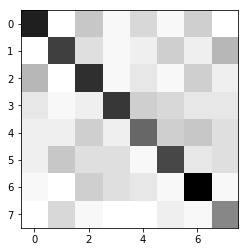

In [8]:
import matplotlib.pyplot as plt
plt.imshow(cm, cmap='binary')

In [9]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
Accuracy_Score = accuracy_score(y_test,y_pred)
Precision_Score = precision_score(y_test, y_pred, average="macro")
Recall_Score = recall_score(y_test, y_pred, average="macro")
F1_Score = f1_score(y_test, y_pred, average="macro")

In [10]:
Accuracy_Score

0.5333333333333333

In [11]:
Precision_Score

0.5357685078079815

In [12]:
Recall_Score

0.5390625

In [13]:
F1_Score

0.5303923562308202